<a href="https://colab.research.google.com/github/RizkyMlana/Analytics-Data-Project/blob/main/Analytics%20Data%20Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Air
- **Nama:** Rizky Maulana Saputra
- **Email:** rizkyzky345@gmail.com
- **ID Dicoding:** MC268D5Y2179

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan tingkat polusi udara di setiap musim?
- Sejauh mana kecepatan angin memengaruhi tingkat polusi di tiga daerah ini?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import zipfile, os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Melakukan import module yang akan digunakan

## Data Wrangling

### Gathering Data

In [ ]:
zip = zipfile.ZipFile('air.zip','r')
zip.extractall('air')
zip.close()

guanyuan_dir = 'air/AirDataset/Guanyuan.csv'
nongzhanguan_dir = 'air/AirDataset/Nongzhanguan.csv'

Mengekstrak dataset berbentuk zip menjadi folder


In [ ]:
guan_df = pd.read_csv(guanyuan_dir)
nong_df = pd.read_csv(nongzhanguan_dir)

guan_df['date'] = pd.to_datetime(guan_df[['year', 'month', 'day', 'hour']])
nong_df['date'] = pd.to_datetime(nong_df[['year', 'month', 'day', 'hour']])

Membaca dataset dan menambahkan variabel baru yakni date di kedua dataset

In [ ]:
guan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,2013-03-01 04:00:00


In [ ]:
nong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan,2013-03-01 02:00:00
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan,2013-03-01 04:00:00


**Insight:**

Pada analisis ini saya menggunakan dua data dari dua distrik yang ada di china yaitu Guanyuan dan Nongzhanguan
- Guanyuan dan Nongzhanguan adalah dua distrik dengan karakteristik yang berbeda. Guanyuan terletak pada pusat kota dan Nongzhanguan terletak jauh dari pusat kota
- Dengan perbedaan jarak dari pusat kota, saya ingin menganalisis akankah letak distrik akan menyebabkan sebuah perbedaan

### Assessing Data

In [ ]:
guan_df.info()
guan_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   year     35064 non-null  int64         
 2   month    35064 non-null  int64         
 3   day      35064 non-null  int64         
 4   hour     35064 non-null  int64         
 5   PM2.5    34448 non-null  float64       
 6   PM10     34635 non-null  float64       
 7   SO2      34590 non-null  float64       
 8   NO2      34405 non-null  float64       
 9   CO       33311 non-null  float64       
 10  O3       33891 non-null  float64       
 11  TEMP     35044 non-null  float64       
 12  PRES     35044 non-null  float64       
 13  DEWP     35044 non-null  float64       
 14  RAIN     35044 non-null  float64       
 15  wd       34983 non-null  object        
 16  WSPM     35050 non-null  float64       
 17  station  35064 non-null  object

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


In [ ]:
nong_df.info()
nong_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   year     35064 non-null  int64         
 2   month    35064 non-null  int64         
 3   day      35064 non-null  int64         
 4   hour     35064 non-null  int64         
 5   PM2.5    34436 non-null  float64       
 6   PM10     34624 non-null  float64       
 7   SO2      34618 non-null  float64       
 8   NO2      34372 non-null  float64       
 9   CO       33858 non-null  float64       
 10  O3       34558 non-null  float64       
 11  TEMP     35044 non-null  float64       
 12  PRES     35044 non-null  float64       
 13  DEWP     35044 non-null  float64       
 14  RAIN     35044 non-null  float64       
 15  wd       34986 non-null  object        
 16  WSPM     35050 non-null  float64       
 17  station  35064 non-null  object

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,628
PM10,440
SO2,446
NO2,692
CO,1206


Checking apakah ada missing values pada data

In [ ]:
print('Guanyuan duplicated Data : ', guan_df.duplicated().sum())
print('Nongzhanguan duplicated data : ', nong_df.duplicated().sum())

Guanyuan duplicated Data :  0
Nongzhanguan duplicated data :  0


Checking apakah ada data yang duplikat pada kedua dataset

In [ ]:
guan_df.describe().T[['min','25%','75%','max']]

,min,25%,75%,max
No,1.0,8766.75,26298.25,35064.0
year,2013.0,2014.0,2016.0,2017.0
month,1.0,4.0,10.0,12.0
day,1.0,8.0,23.0,31.0
hour,0.0,5.75,17.25,23.0
PM2.5,2.0,23.0,115.0,680.0
PM10,2.0,40.0,149.0,999.0
SO2,1.0,3.0,22.0,293.0
NO2,2.0,31.0,78.0,270.0
CO,100.0,500.0,1600.0,10000.0


Mencari apakah ada nilai outlier pada kedua data

In [ ]:
guan_check = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']

for i in guan_check :
  Q1 = guan_df[i].quantile(0.25)
  Q3 = guan_df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = guan_df[(guan_df[i] < lower_bound) | (guan_df[i] > upper_bound)]
  print(f"Kolom {i}: {len(outliers)} outliers")

Kolom PM2.5: 1504 outliers
Kolom PM10: 1186 outliers
Kolom SO2: 3020 outliers
Kolom NO2: 664 outliers
Kolom CO: 2167 outliers
Kolom O3: 1343 outliers
Kolom TEMP: 0 outliers
Kolom PRES: 0 outliers
Kolom DEWP: 0 outliers
Kolom RAIN: 1380 outliers
Kolom WSPM: 1742 outliers


In [ ]:
guan_df[['TEMP','PRES','DEWP']].skew()

,0
TEMP,-0.094158
PRES,0.111500
DEWP,-0.213209


In [ ]:
nong_df.describe().T[['min','25%','75%','max']]

,min,25%,75%,max
No,1.0,8766.75,26298.25,35064.0
year,2013.0,2014.0,2016.0,2017.0
month,1.0,4.0,10.0,12.0
day,1.0,8.0,23.0,31.0
hour,0.0,5.75,17.25,23.0
PM2.5,2.0,22.0,116.0,844.0
PM10,2.0,38.0,149.0,995.0
SO2,0.5712,3.0,23.0,257.0
NO2,2.0,29.0,80.0,273.0
CO,100.0,500.0,1600.0,10000.0


In [ ]:
nong_check = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']

for i in nong_check :
  Q1 = nong_df[i].quantile(0.25)
  Q3 = nong_df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = nong_df[(nong_df[i] < lower_bound) | (nong_df[i] > upper_bound)]
  print(f"Kolom {i}: {len(outliers)} outliers")

Kolom PM2.5: 1765 outliers
Kolom PM10: 1379 outliers
Kolom SO2: 3019 outliers
Kolom NO2: 520 outliers
Kolom CO: 2461 outliers
Kolom O3: 1428 outliers
Kolom TEMP: 0 outliers
Kolom PRES: 0 outliers
Kolom DEWP: 0 outliers
Kolom RAIN: 1371 outliers
Kolom WSPM: 1609 outliers


In [ ]:
nong_df[['TEMP','PRES','DEWP']].skew()

,0
TEMP,-0.100866
PRES,0.099633
DEWP,-0.196896


**Insight:**

Dari evaluasi kedua data tersebut terdapat informasi sebagai berikut :
- Terdapat missing values pada beberapa kolom di kedua data tersebut
- Kedua data memiliki outlier di variabel PM2.5, PM10,SO2, NO2, CO, O3, RAIN, WSPM yang nilai max nya terlalu tinggi
- Kedua dataset tidak memiliki nilai duplikat
- Terdapat missing values di variabel TEMP, PRES, DEWP namun tidak terdapat outlier jadi cek skewness untuk menentukan apa yang dilakukan di cleaning data

### Cleaning Data

In [ ]:
guan_df[['PM2.5','PM10','SO2','NO2','CO','O3','RAIN','WSPM']] = guan_df[['PM2.5','PM10','SO2','NO2','CO','O3','RAIN','WSPM']].interpolate()
guan_df['TEMP'] = guan_df['TEMP'].fillna(guan_df['TEMP'].mean())
guan_df['PRES'] = guan_df['PRES'].fillna(guan_df['PRES'].mean())
guan_df['DEWP'] = guan_df['DEWP'].fillna(guan_df['DEWP'].mean())
guan_df['wd'] = guan_df['wd'].bfill()

In [ ]:
nong_df[['PM2.5','PM10','SO2','NO2','CO','O3','RAIN','WSPM']] = nong_df[['PM2.5','PM10','SO2','NO2','CO','O3','RAIN','WSPM']].interpolate()
nong_df['TEMP'] = nong_df['TEMP'].fillna(nong_df['TEMP'].mean())
nong_df['PRES'] = nong_df['PRES'].fillna(nong_df['PRES'].mean())
nong_df['DEWP'] = nong_df['DEWP'].fillna(nong_df['DEWP'].mean())
nong_df['wd'] = nong_df['wd'].bfill()

Mengisi missing values dari kedua dataset

In [ ]:
guan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [ ]:
nong_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**

Dari cleaning data diatas terdapat informasi yaitu :
- Kolom yang memiliki outlier di dalamnya bisa mengisi missing values dengan interpolasi
- Kolom yang tidak memiliki outlier di dalamnya bisa cek skewness karena skew mendekati normal maka menggunakan mean untuk mengisi missing values
- Untuk kolom wd karena terdapat missing values saya menggunakan data dari hari sebelumnya karena wind direction tidak dari hari ini dan hari sebelumnya tidak jauh berbeda


## Exploratory Data Analysis (EDA)

### Exploring Data Gabungan antara dataset Guanyuan dan Nongzhanguan

In [52]:
fusion = pd.merge(guan_df, nong_df, on=['year', 'month', 'day', 'hour'], suffixes=('_guanyuan', '_nongzhanguan'))
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
fusion.head()

,No_guanyuan,year,month,day,hour,PM2.5_guanyuan,PM10_guanyuan,SO2_guanyuan,NO2_guanyuan,CO_guanyuan,...,CO_nongzhanguan,O3_nongzhanguan,TEMP_nongzhanguan,PRES_nongzhanguan,DEWP_nongzhanguan,RAIN_nongzhanguan,wd_nongzhanguan,WSPM_nongzhanguan,station_nongzhanguan,date_nongzhanguan
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,...,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,...,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,...,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,...,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,...,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan,2013-03-01 04:00:00


Menggabungkan kedua data berdasarkan tahun, bulan, hari dan jam

In [53]:
def get_season(x):
  if x in [12,1,2]:
    return 'Winter'
  elif x in [3,4,5]:
    return 'Spring'
  elif x in [6,7,8]:
    return 'Summer'
  else:
    return 'Autumn'

fusion['season'] = fusion['month'].apply(get_season)
if 'season' not in fusion.columns:
    fusion['season'] = fusion['season_guanyuan']

Menambahkan variabel baru yaitu season karena terkait pertanyaan bisnis

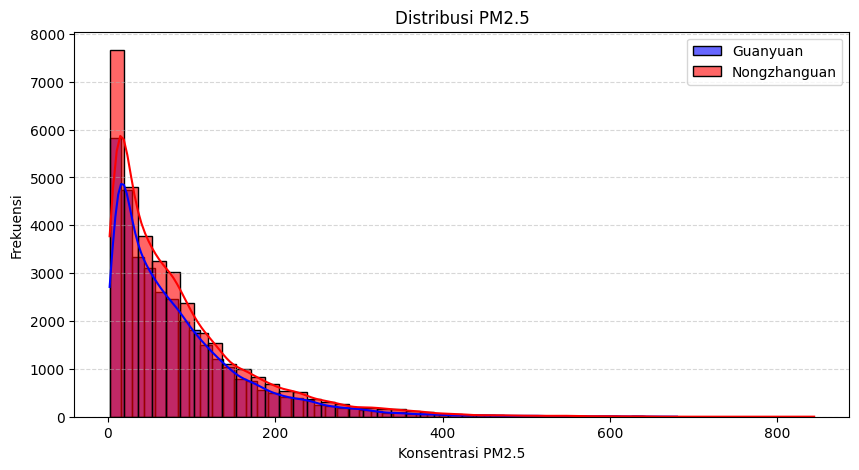

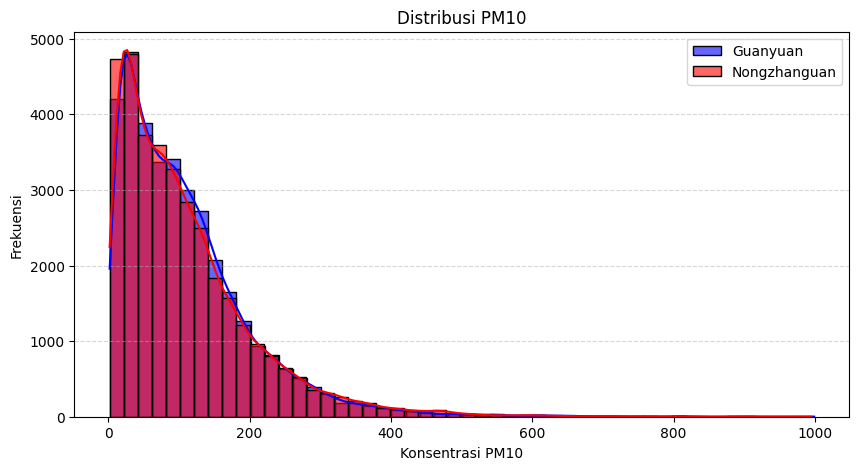

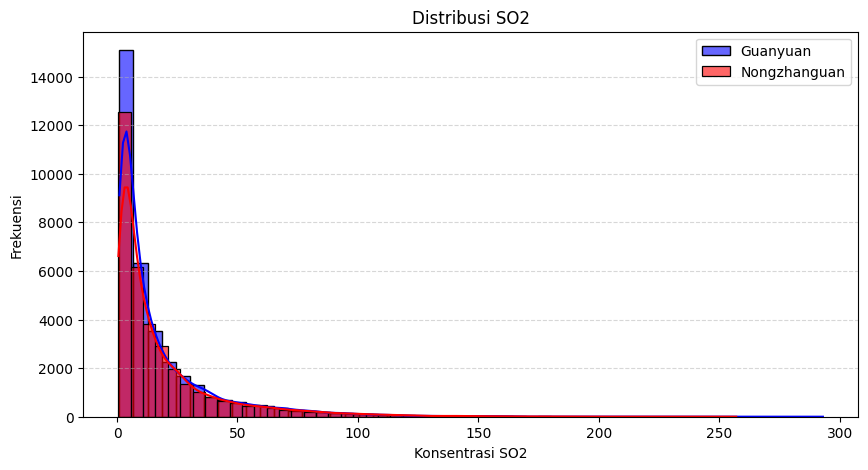

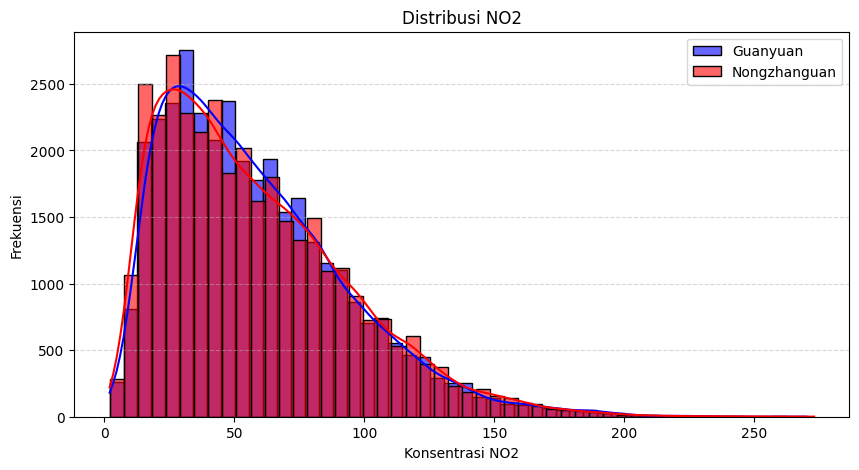

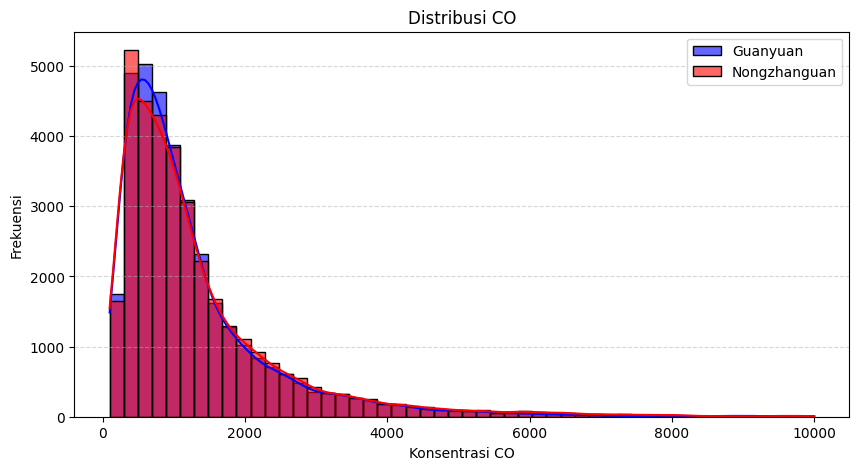

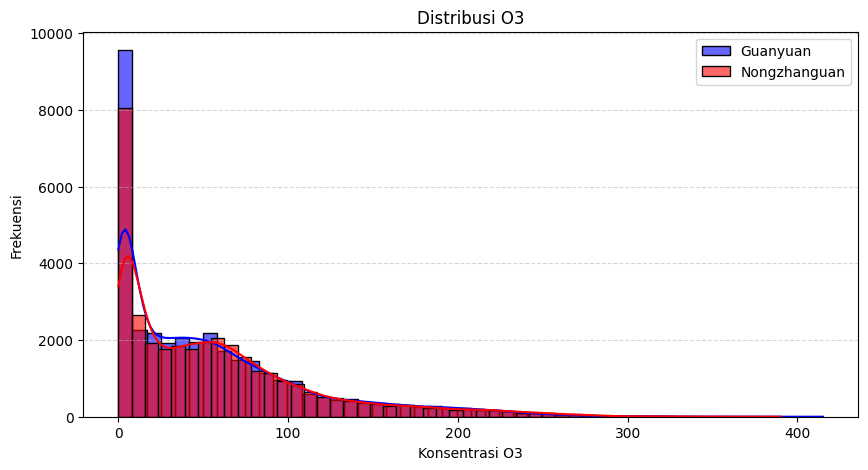

In [54]:
for pollutant in pollutants:
    plt.figure(figsize=(10, 5))

    pollutant_guanyuan = f"{pollutant}_guanyuan"
    pollutant_nongzhanguan = f"{pollutant}_nongzhanguan"

    if pollutant_guanyuan in fusion.columns and pollutant_nongzhanguan in fusion.columns:
        sns.histplot(fusion[pollutant_guanyuan], bins=50, kde=True, color='b', label='Guanyuan', alpha=0.6)
        sns.histplot(fusion[pollutant_nongzhanguan], bins=50, kde=True, color='r', label='Nongzhanguan', alpha=0.6)

        plt.title(f'Distribusi {pollutant}')
        plt.xlabel(f'Konsentrasi {pollutant}')
        plt.ylabel('Frekuensi')
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.5)

        plt.show()

**Insight:**
- Dalam mengeksplor dataset ini untuk mendapat bagian bagian yang diperlukan untuk menjawab pertanyaan dataset Guanyuan dan Nongzhanguan digabung menggunakan method merge dan dimasukkan pada dataframe fusion lalu dibuat suatu variabel berisi list unsur yang dapat menjadi pollutan untuk memudahkan membuat tabel atau grafik menyangkut pollutan pollutan tersebut
- Membuat variabel season untuk kebutuhan analisis dari pertanyaan bisnis

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan tingkat polusi udara di setiap musim?

<Figure size 1000x500 with 0 Axes>

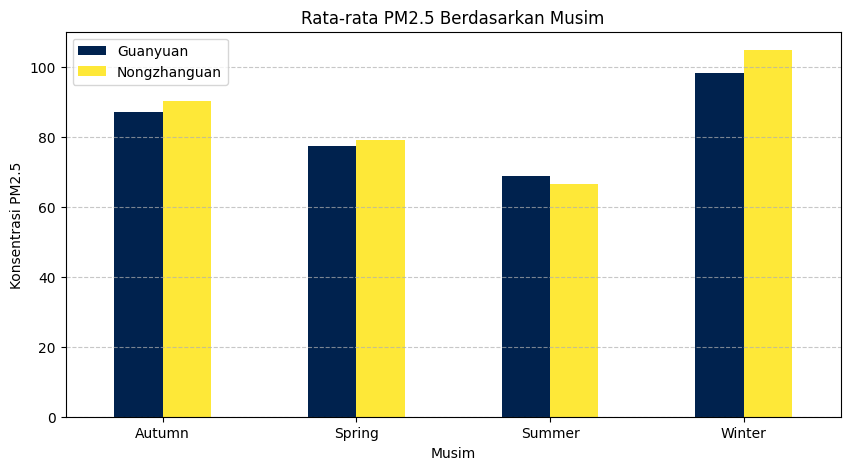

<Figure size 1000x500 with 0 Axes>

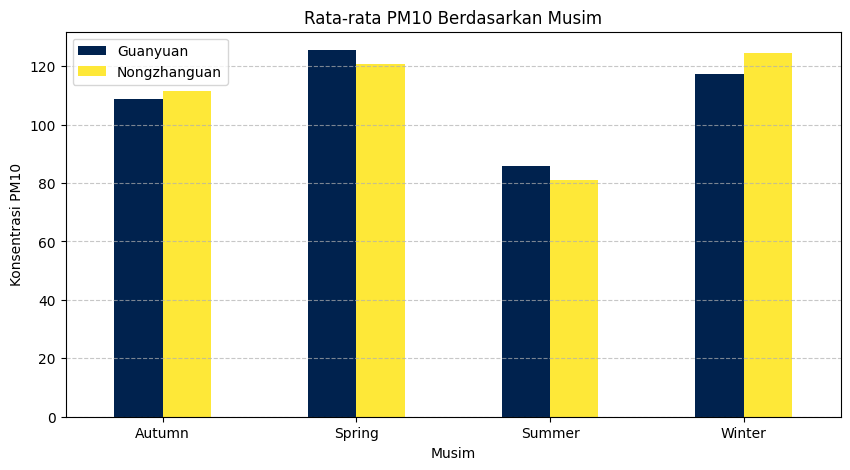

<Figure size 1000x500 with 0 Axes>

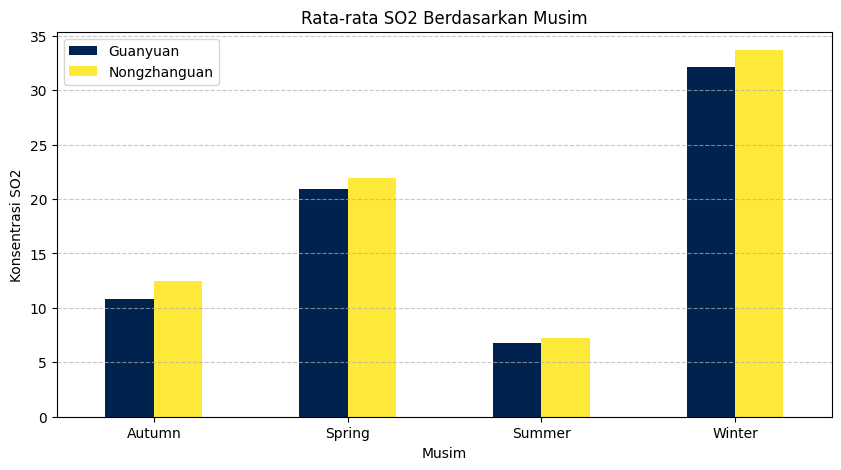

<Figure size 1000x500 with 0 Axes>

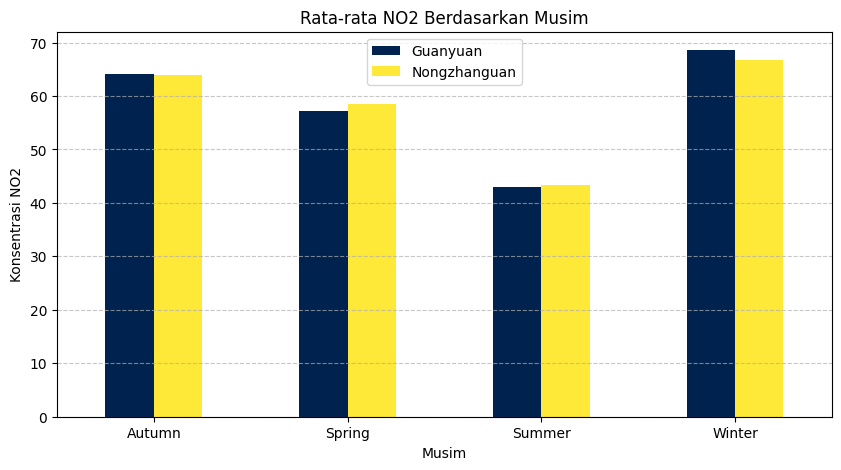

<Figure size 1000x500 with 0 Axes>

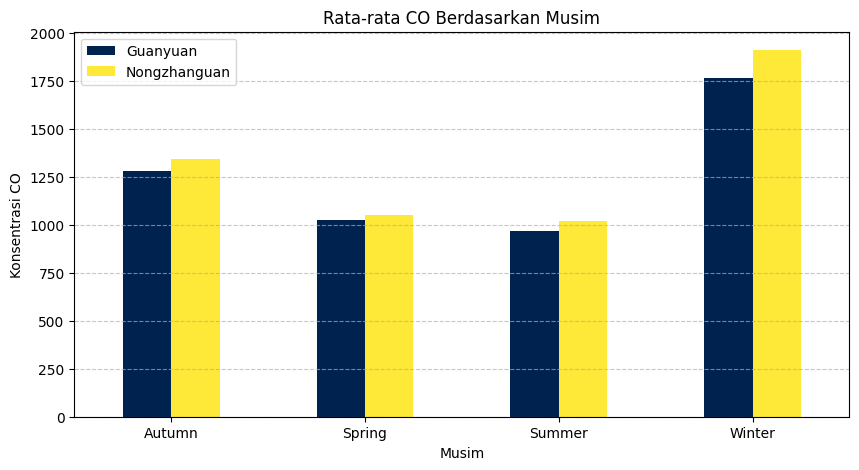

<Figure size 1000x500 with 0 Axes>

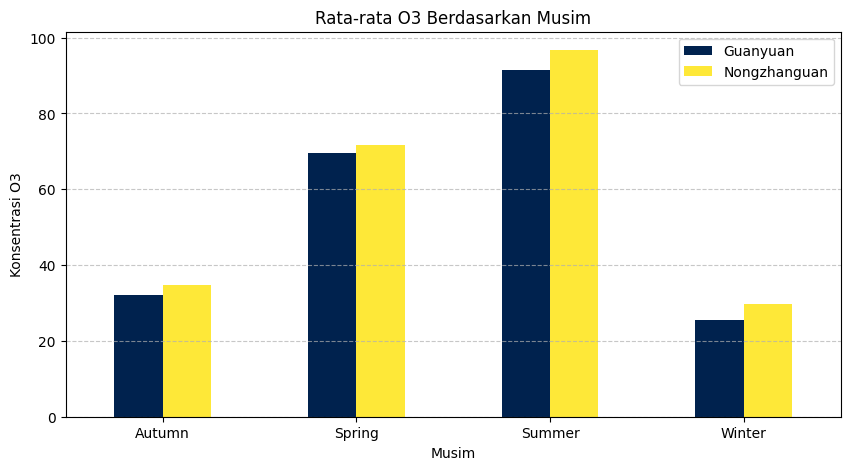

In [59]:
if "season_guanyuan" in fusion.columns:
    fusion["season"] = fusion["season_guanyuan"]

for pollutant in pollutants:
    pollutant_guanyuan = f"{pollutant}_guanyuan"
    pollutant_nongzhanguan = f"{pollutant}_nongzhanguan"

    if pollutant_guanyuan in fusion.columns and pollutant_nongzhanguan in fusion.columns:
        seasonal_pollution = fusion.groupby("season")[[pollutant_guanyuan, pollutant_nongzhanguan]].mean()

        plt.figure(figsize=(10, 5))
        seasonal_pollution.plot(kind="bar", figsize=(10, 5), colormap='cividis')
        plt.title(f"Rata-rata {pollutant} Berdasarkan Musim")
        plt.ylabel(f"Konsentrasi {pollutant}")
        plt.xlabel("Musim")
        plt.xticks(rotation=0)
        plt.legend(["Guanyuan", "Nongzhanguan"])
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()



Melihat perbedaan pollutant tiap season

### Pertanyaan 2: Sejauh mana kecepatan angin memengaruhi tingkat polusi di tiga daerah ini?

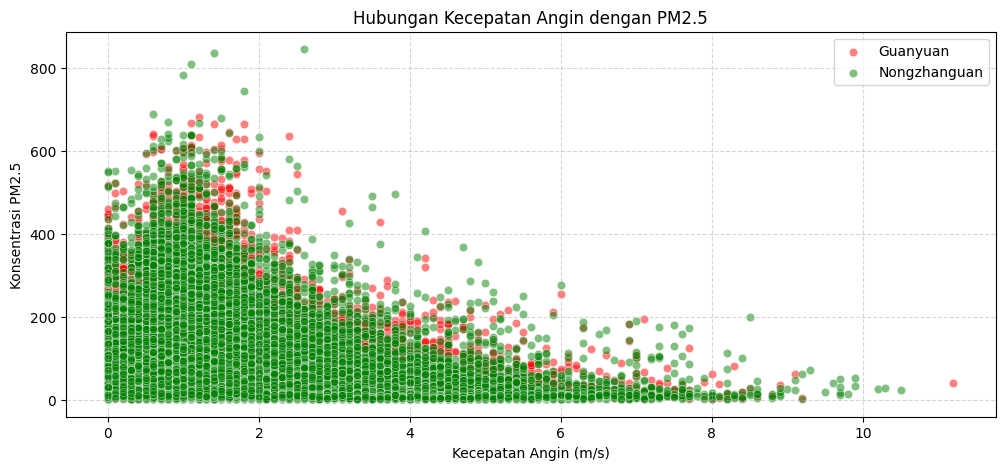

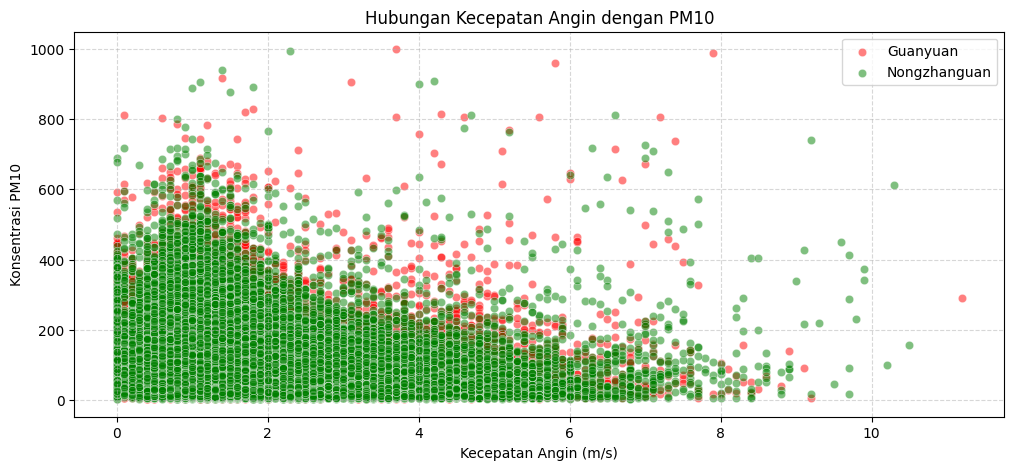

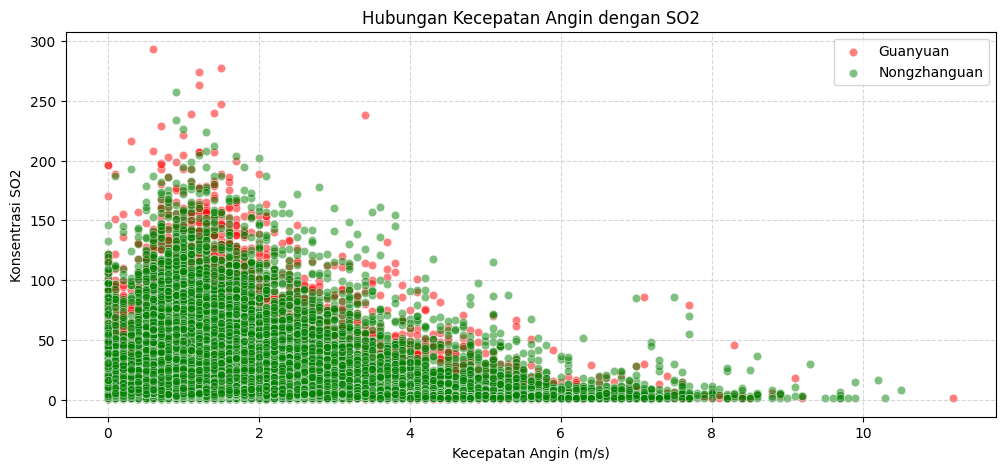

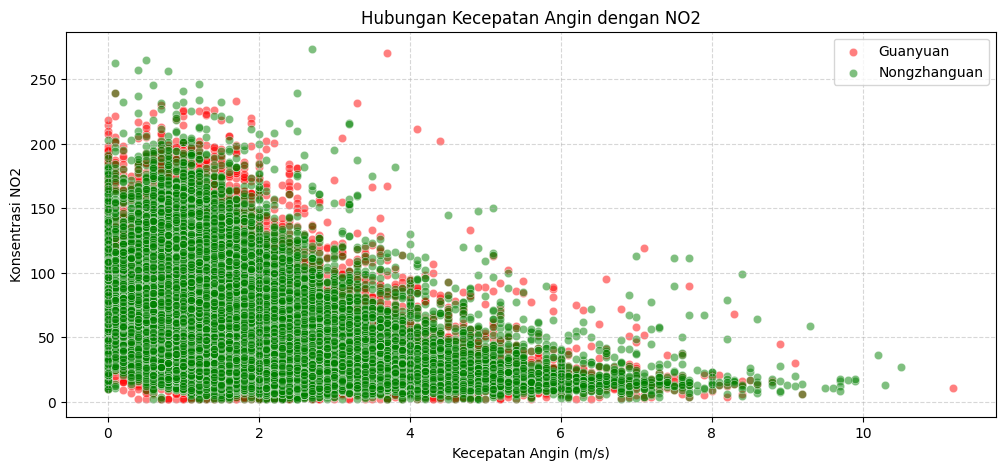

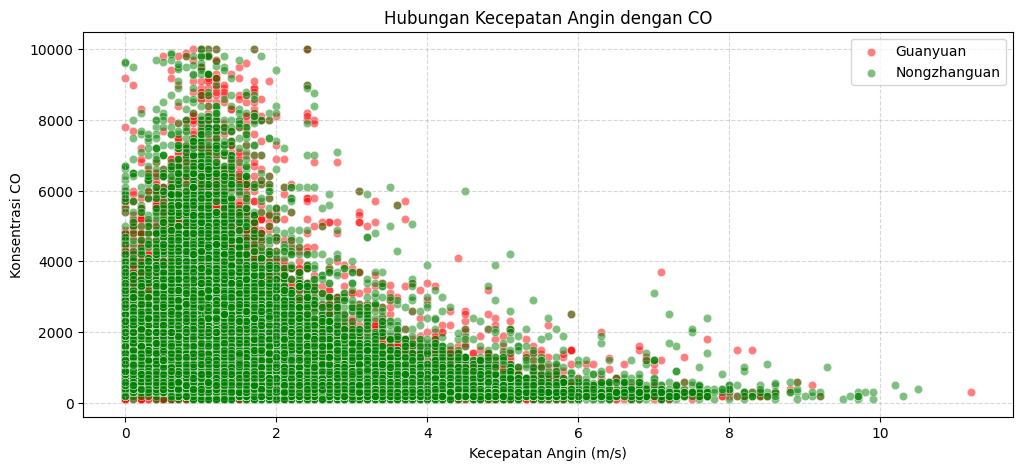

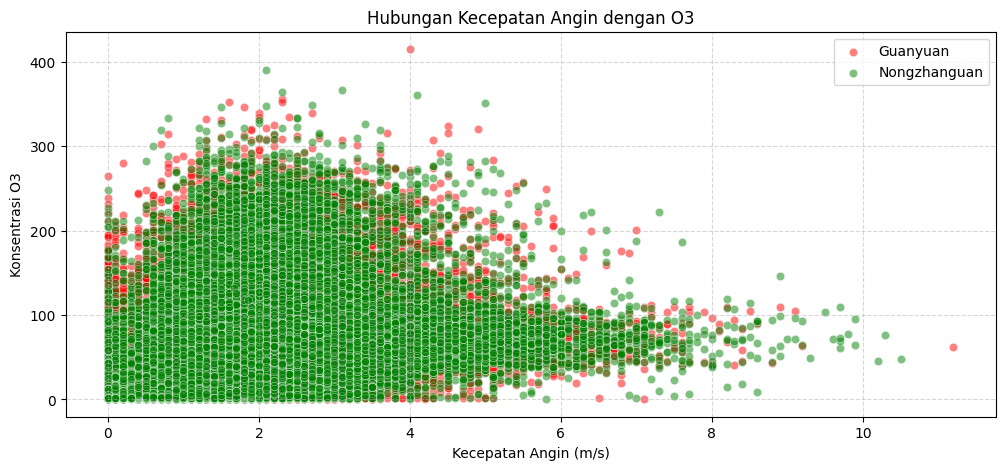

In [61]:
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for pollutant in pollutants:
    plt.figure(figsize=(12, 5))

    pollutant_guanyuan = f"{pollutant}_guanyuan"
    pollutant_nongzhanguan = f"{pollutant}_nongzhanguan"

    if pollutant_guanyuan in fusion.columns and pollutant_nongzhanguan in fusion.columns:
        sns.scatterplot(x=fusion["WSPM_guanyuan"], y=fusion[pollutant_guanyuan],
                        color="red", alpha=0.5, label="Guanyuan")
        sns.scatterplot(x=fusion["WSPM_nongzhanguan"], y=fusion[pollutant_nongzhanguan],
                        color="green", alpha=0.5, label="Nongzhanguan")

        plt.title(f"Hubungan Kecepatan Angin dengan {pollutant}")
        plt.xlabel("Kecepatan Angin (m/s)")
        plt.ylabel(f"Konsentrasi {pollutant}")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.show()

Melihat pengaruh kecepatan angin dengan


**Insight:**
- Penggunaan Bar chart digunakan untuk membandingkan rata-rata konsentrasi polutan di setiap musim, memungkinkan melihat pola musiman dengan jelas
- Terdapat lonjakan tinggi pada variabel PM2.5 dan PM10 di musim dingin, hal ini bisa disebabkan oleh faktor seperti inversi suhu dan penggunaan pemanas ruangan yang meningkatkan emisi.
- Dengan menggunakan Grid membantu pembacaan lebih jelas, sementara colormap "cividis" membuat perbedaan antar musim lebih mudah diinterpretasikan.
- Scatter plot ini digunakan untuk menganalisis hubungan antara kecepatan angin dan konsentrasi polutan. Jika titik-titik menunjukkan tren menurun, ini mengindikasikan bahwa angin membantu mengurangi polusi dengan menyebarkan partikel polutan.



## Analisis Lanjutan (Opsional)

## Conclusion

**Bagaimana perbedaan tingkat polusi udara di setiap musim?**
- Kesimpulan yang dapat saya ambil ialah dari kedua distrik ada perbedaan yang terlalu jauh yakni musim dingin memiliki konsentrasi pollutant yang lebih tinggi dari musim yang lain ada kemungkinan besar disebabkan oleh faktor seperti peningkatan penggunaan pemanas yang menghasilkan emisi dan musim panas memiliki konsentrasi pollutant yang lebih rendah dari musim yang lain yang mungkin disebabkan oleh hujan yang mengurangi pollutant.

**Sejauh mana kecepatan angin memengaruhi tingkat polusi di tiga daerah ini?**
- Kesimpulan yang saya ambil ialah angin sangat mempengaruhi tingkat pollutant dari suatu distrik dapat dilihat dari scatter plot yang dibuat menunjukkan pada kecepatan 0-2 m/s kondisi pollutant justru lebih tinggi. Namun pada kecepatan >4 m/s kondisi pollutant menurun drastis mengindikasikan angin berperan dalam membersihkan polusi udara.